# Bayesian Theory and Computation
# Project 1

**Naman Chhibbar** *MA21BTECH11011* \
**Abhay Gupta** *BM21BTECH11001*

## Installing and Importing dependencies

In [2]:
# Uncomment the line below to install dependencies
# !pip install numpy scipy pandas matplotlib

In [3]:
from warnings import filterwarnings

import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt

filterwarnings("ignore")

## Loading the data

In [4]:
# Naman
data_path = "/Users/naman/Workspace/Data/Bayesian-Theory/breast-cancer.csv"

# Abhay
# data_path = ""

In [5]:
data = pd.read_csv(data_path)
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [6]:
# Extract column of interest
data = data["perimeter_mean"].dropna()
data.tail()

564    142.00
565    131.20
566    108.30
567    140.10
568     47.92
Name: perimeter_mean, dtype: float64

## Visualize the data

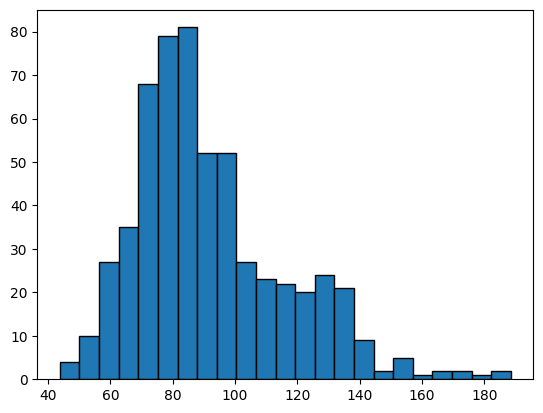

In [7]:
# Plot histogram
bins = int(len(data) ** .5)
plt.hist(data, bins=bins, edgecolor="black")
plt.show()

## Modelling data with normal distribution

First, we use Box-Cox transformation to reduce skewness of our data.

Box-Cox transformation with the parameter $\lambda$ is defined as:

$$
\text{Box-Cox}(x_i; \lambda) =
\begin{cases}
\frac{1}{\lambda} (x_i ^ \lambda - 1) & \lambda \ne 0 \\
\ln x_i & \lambda = 0
\end{cases}
$$

### Plotting transformed data with best fit normal distributions

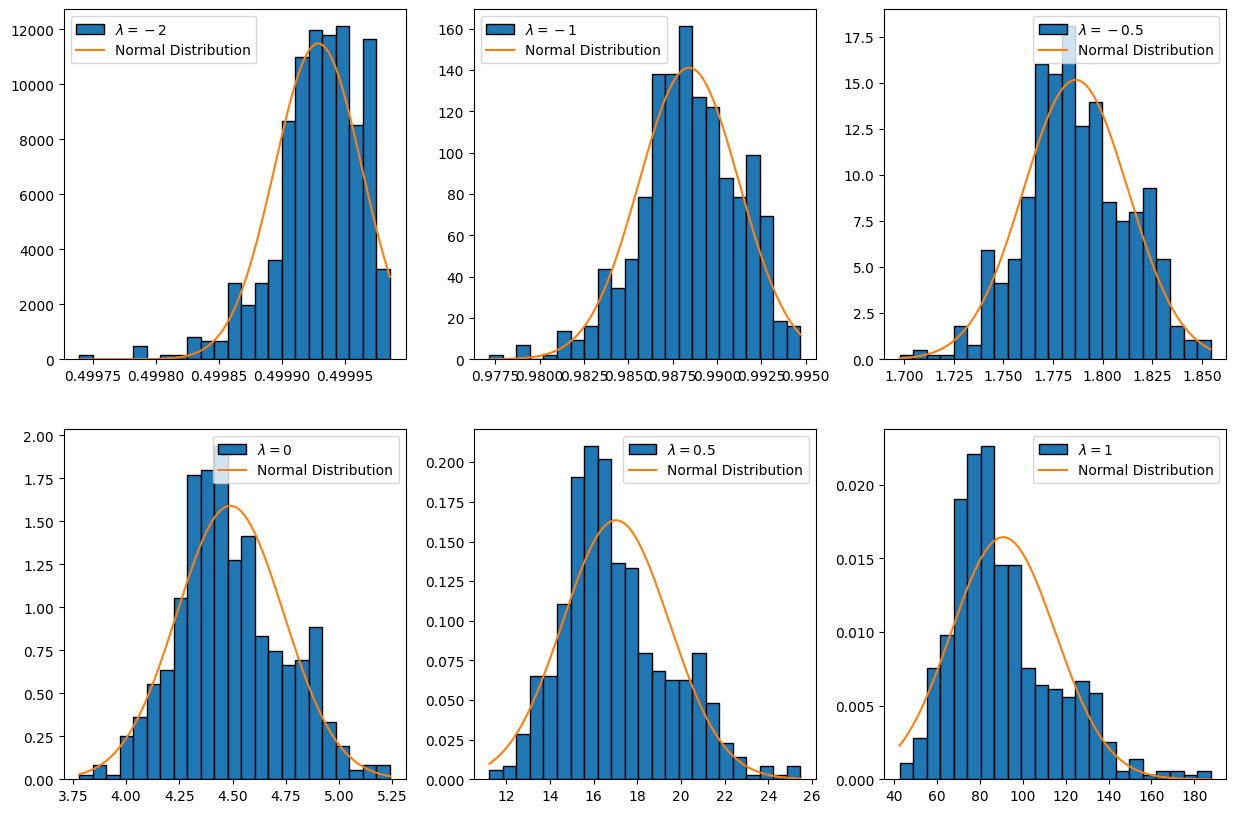

In [8]:
# Lambda values for box-cox transformation
lambda_vals = [-2, -1, -.5, 0, .5, 1]

# Number of points to plot for normal distribution
num_points = 1000

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.flatten()

for i, lambda_val in enumerate(lambda_vals):

  # Transform data
  transformed = st.boxcox(data, lambda_val)

  # Plot histogram
  ax[i].hist(
    transformed,
    bins = bins,
    edgecolor = "black",
    density = True,
    label = f"$\lambda = {lambda_val}$"
  )

  # Fit normal distribution
  mean, sd = st.norm.fit(transformed)

  # Plot normal distribution
  grid = np.linspace(min(transformed), max(transformed), num_points)
  normal_pdf = st.norm.pdf(grid, mean, sd)
  ax[i].plot(grid, normal_pdf, label = f"Normal Distribution")

  ax[i].legend()

plt.show()

### Validating using Q-Q plots

We check how well the transformed data fit the normal distribution using a Q-Q plot.

A Quantile-Quantile (Q-Q) plot is made by plotting the theoretical quantiles against the observed quantiles.

The theoretical quantile corresponsing to $x_{(i)}$ is:

$$ y_i = F^{-1}\left(\frac{i}{n + 1}\right) \qquad i \in \{1, 2, ..., n\} $$

where $n$ is the number of data points, $x_{(i)}$ is the $i$ th data point in ascending order, and $F$ is the theoretical CDF of the distribution we are testing for.

If the Q-Q plot lies along a straight line, it indicates that the given sample follows the theoretical distribution.

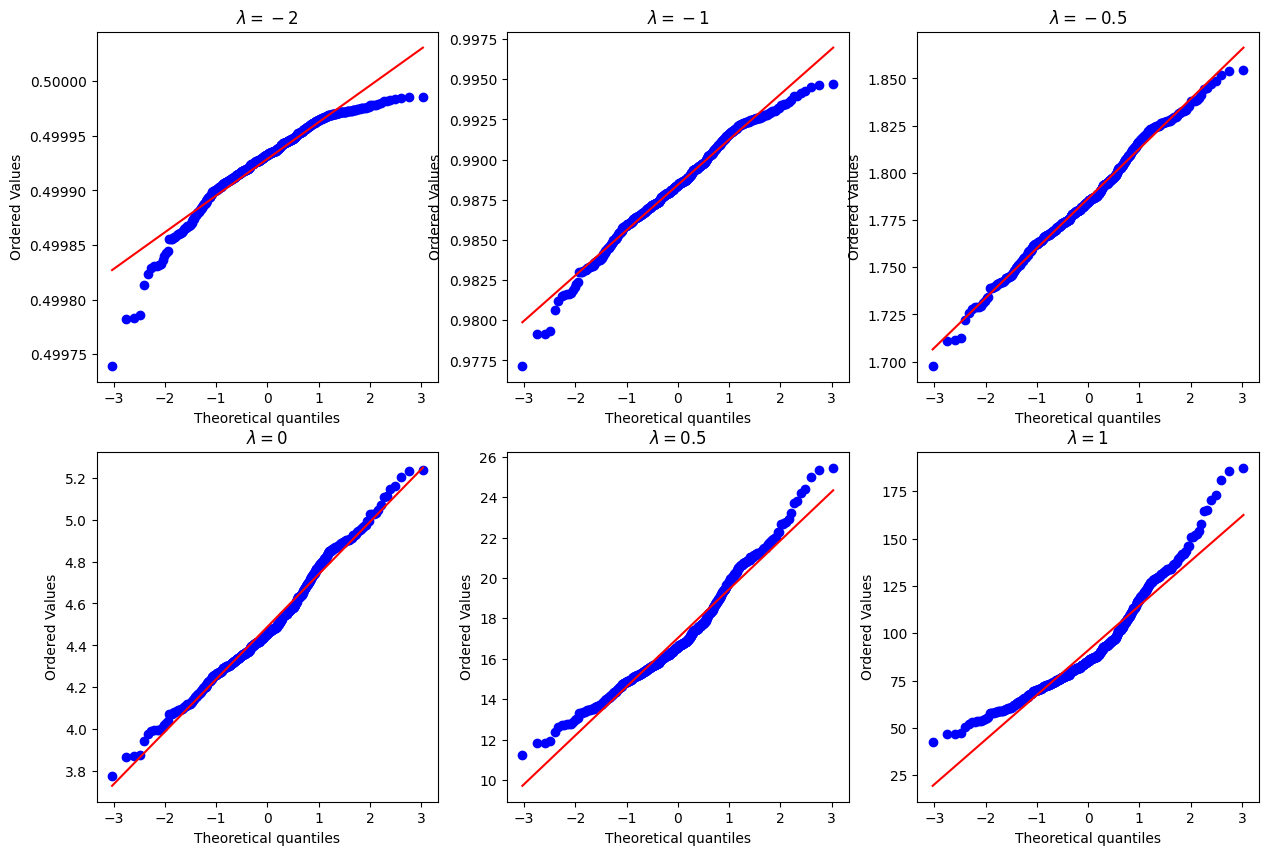

In [9]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.flatten()

for i, lambda_val in enumerate(lambda_vals):

  # Transform data
  transformed = st.boxcox(data, lambda_val)

  # Plot Q-Q plot
  st.probplot(transformed, dist="norm", plot=ax[i])
  ax[i].set_title(f"$\lambda = {lambda_val}$")

plt.show()

### Calculating optimal $\lambda$

We plot multiple $\lambda$ values against the normality of the transformation to calculate the optimal value of $\lambda$.

Normality of the transformation is calculated as the Pearson's correlation coefficient between the theoretical quantiles and the observed quantiles.

Pearson's correlation coefficient is calculated as:

$$ r(x, y) = \frac{\mu_{xy} - \mu_x \cdot \mu_y}{\sigma_x \cdot \sigma_y} $$

where $x$ and $y$ are two samples, $\mu_x$ denotes the mean and $\sigma_x$ denotes the standard deviation of $x$.

Best lambda: -0.48484848484848475
Normality: 0.9967378414730642


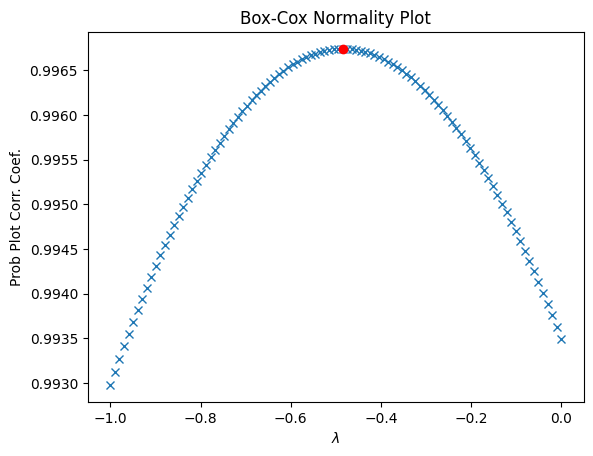

In [10]:
lambda_lower = -1
lambda_upper = 0
N = 100

lambdas, normality = st.boxcox_normplot(data, lambda_lower, lambda_upper, plot=plt, N=N)

best_index = np.argmax(normality)
best_lambda = lambdas[best_index]

plt.plot(best_lambda, normality[best_index], "ro")

print(f"Best lambda: {best_lambda}\nNormality: {normality[best_index]}")

### Transforming data

Finally, we transform the data with the optimal value of $\lambda$.

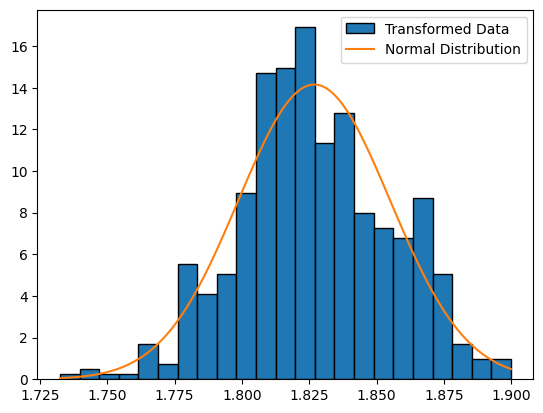

In [11]:
transformed = st.boxcox(data, best_lambda)

mean, sd = st.norm.fit(transformed)
grid = np.linspace(min(transformed), max(transformed), num_points)
normal_pdf = st.norm.pdf(grid, mean, sd)

plt.hist(transformed, bins=bins, edgecolor="black", density=True, label="Transformed Data")
plt.plot(grid, normal_pdf, label="Normal Distribution")
plt.legend()
plt.show()

## Bayesian Analysis of Model Parameters

### Bayesian Analysis of Mean

Assuming our data $X | \mu \sim N(\mu, \sigma^2)$, where $\sigma$ is known, we have:

$$ f(x | \mu) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right) $$

The likelihood function, given the data $\bar{x} = (x_1, x_2, \dots, x_n)$, can be calculated as:

$$
\begin{align*}
L(\mu | \bar{x}) &= \prod_{i = 1}^{n} f(x_i | \mu) \\
&= \prod_{i = 1}^{n} \left(\frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)\right) \\
&\propto \exp\left(-\frac{\sum_{i = 1}^{n} (x_i - \mu)^2}{2\sigma^2}\right) \\
&\propto \exp\left(-\frac{\sum_{i = 1}^{n} (\mu^2 - 2x_i ~ \mu + x_i^2)}{2\sigma^2}\right) \\
&\propto \exp\left(-\frac{n \mu^2 - 2\sum_{i = 1}^{n} x_i ~ \mu + \sum_{i = 1}^{n} x_i^2}{2\sigma^2}\right) \\
&\propto \exp\left(-\frac{n \mu^2 - 2\sum_{i = 1}^{n} x_i ~ \mu}{2\sigma^2}\right) \\
&\propto \exp\left(-\frac{n}{2\sigma^2} \left(\mu^2 - 2\sum_{i = 1}^{n} x_i / n ~ \mu\right)\right) \\
&\propto \exp\left(-\frac{n}{2\sigma^2} \left(\mu - \sum_{i = 1}^{n} x_i / n\right)^2\right) \\
\end{align*}
$$

Supose $\mu \sim N(u, v)$ is the prior distribution of $\mu$, then:

$$
\begin{align*}
f(\mu) &= \frac{1}{\sqrt{2\pi v}} \exp\left(-\frac{(\mu - u)^2}{2v}\right) \\
&\propto \exp\left(-\frac{\mu^2 - 2u \mu + u^2}{2v}\right) \\
&\propto \exp\left(-\frac{\mu^2 - 2u \mu}{2v}\right)
\end{align*}
$$

The posterior distribution will be:

$$
\begin{align*}
f(\mu | \bar{x}) &\propto f(\mu) \cdot L(\mu | \bar{x}) \\
&\propto \exp\left(-\frac{\mu^2 - 2u \mu}{2v}\right) \cdot \exp\left(-\frac{n \mu^2 - 2\sum_{i = 1}^{n} x_i ~ \mu}{2\sigma^2}\right) \\
&\propto \exp\left(-\frac{\mu^2 - 2u \mu}{2v} - \frac{n \mu^2 - 2\sum_{i = 1}^{n} x_i ~ \mu}{2\sigma^2}\right) \\
&\propto \exp\left(-\frac{1}{2v \sigma^2} \left((n v + \sigma^2) \mu^2 - 2(u \sigma^2 + v \sum_{i = 1}^{n} x_i ~ \mu)\right)\right) \\
&\propto \exp\left(-\frac{n v + \sigma^2}{2v \sigma^2} \left(\mu - \frac{u \sigma^2 + v \sum_{i = 1}^{n} x_i}{n v + \sigma^2}\right)^2\right) \\
&\propto \exp\left(-\frac{1}{2v'} (\mu - u')^2\right)
\end{align*}
$$

where $u' = \left(u \sigma^2 + v \sum_{i = 1}^{n} x_i\right) / (n v + \sigma^2)$ and $v' = v \sigma^2/(n v + \sigma^2)$.

By the kernel of the posterior distribution, it is evident that $\mu | \bar{x} \sim N(u', v')$.

We can clearly see that the posterior mean is a weighted average of the prior mean and the "likelihood mean":

$$
\begin{align*}
u' &= \frac{1}{n v + \sigma^2} \left(u \sigma^2 + v \sum_{i = 1}^{n} x_i\right) \\
&= \frac{1}{v + \sigma^2 / n} \left(u \sigma^2 / n + v \sum_{i = 1}^{n} x_i / n\right) \\
&= \frac{\sigma^2 / n}{v + \sigma^2 / n} \cdot u + \frac{v}{v + \sigma^2 / n} \cdot \sum_{i = 1}^{n} x_i / n \\
&= w_n \cdot u + (1 - w_n) \cdot \sum_{i = 1}^{n} x_i / n
\end{align*}
$$

where $w_n = \frac{\sigma^2 / n}{v + \sigma^2 / n}$.
We can also see that $\lim_{n \to \infty} w_n = 0$, implying that as $n \to \infty$, posterior mean is shifted towards likelihood mean.

Also, the posterior variance, defined as $p' = 1 / v'$, is sum of the prior precision ($p = 1 / v$) and likelihood precision ($p_L = n / \sigma^2$):

$$
\begin{align*}
p' &= \frac{1}{v'} = \frac{n v + \sigma^2}{v \sigma^2} \\
&= \frac{n}{\sigma^2} + \frac{1}{v} \\
&= p_L + p
\end{align*}
$$

We verify these results below.
We take the prior mean and variance to be a multiple of the data mean and variance.

Prior precision: 1965.959620445052

Likelihood precision for n = 1: 1258.2141570848335
Posterior precision for n = 1: 3224.1737775298852
p + p_L = 3224.1737775298852

Likelihood precision for n = 5: 6291.070785424167
Posterior precision for n = 5: 8257.030405869218
p + p_L = 8257.03040586922

Likelihood precision for n = 10: 12582.141570848335
Posterior precision for n = 10: 14548.101191293385
p + p_L = 14548.101191293386



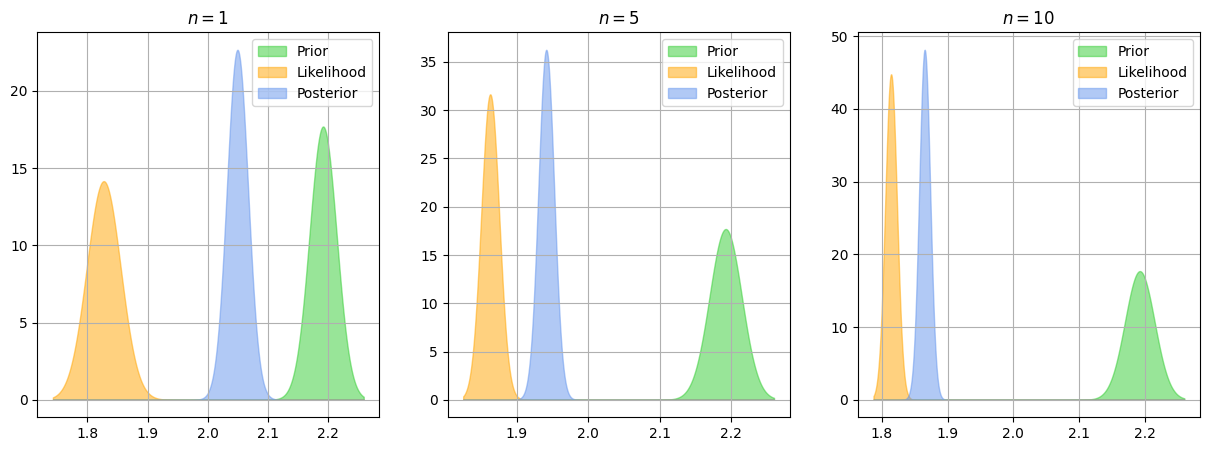

In [20]:
num_samples_list = [1, 5, 10]
prior_mean = mean * 1.2
prior_sd = sd * .8

fig_scale = 5
alpha = .5
fig, ax = plt.subplots(1, 3, figsize=(3 * fig_scale, fig_scale))

print(f"Prior precision: {1 / prior_sd ** 2}", end="\n\n")

for i, num_samples in enumerate(num_samples_list):

  # Sample from transformed data
  sample: np.ndarray | np.float64 = np.random.choice(transformed, num_samples)

  # Likelihood mean and standard deviation
  sample_mean = sample.mean()
  likelihood_sd = sd / num_samples ** .5
  print(f"Likelihood precision for n = {num_samples}: {1 / likelihood_sd ** 2}")

  # Mu grid
  lower = min(prior_mean - 3 * prior_sd, sample_mean - 3 * likelihood_sd)
  upper = max(prior_mean + 3 * prior_sd, sample_mean + 3 * likelihood_sd)
  grid = np.linspace(lower, upper, num_points)

  # Get prior
  prior = st.norm.pdf(grid, prior_mean, prior_sd)

  # Compute likelihood
  likelihood = st.norm.pdf(grid, sample_mean, likelihood_sd)

  # Theoretical posterior
  posterior_mean = (
    prior_mean * sd**2 + prior_sd**2 * sample_mean * num_samples
    ) / (num_samples * prior_sd**2 + sd**2)
  posterior_var = prior_sd**2 * sd**2 / (num_samples * prior_sd**2 + sd**2)
  posterior = st.norm.pdf(grid, posterior_mean, posterior_var ** .5)
  print(f"Posterior precision for n = {num_samples}: {1 / posterior_var}")
  print(f"p + p_L = {1 / prior_sd ** 2 + 1 / likelihood_sd ** 2}", end="\n\n")

  # Plot prior, likelihood, and posterior
  ax[i].set_title(f"$n = {num_samples}$")
  ax[i].fill_between(grid, prior, label="Prior", color="limegreen", alpha=alpha)
  ax[i].fill_between(grid, likelihood, label="Likelihood", color="orange", alpha=alpha)
  ax[i].fill_between(grid, posterior, label="Posterior", color="cornflowerblue", alpha=alpha)
  ax[i].grid()
  ax[i].legend()

plt.show()